# Variant Effect Prediction with Motif Intpretation with Attributions 

This API provides a methodology for interpreting the effects of genetic variants. Specifically, it enables the detection of regulatory elements within both reference and alternative sequences containing variants. This is achieved by calculating gradients for both sequences with respect to the expression of specific genes within a given cellular context.

## CLI API

Command line api to calculate gradients for genetic variatns. 

In [1]:
! decima vep-attribution --help

Usage: decima vep-attribution [OPTIONS]

  Predict variant effect and save to parquet

  Examples:

      >>> decima vep-attribution -v "data/sample.vcf" -o "vep_results"

Options:
  -v, --variants PATH             Path to the variant file .vcf file. VCF file
                                  need to be normalized. Try normalizing th
                                  vcf file incase of an error. `bcftools norm
                                  -f ref.fasta input.vcf.gz -o output.vcf.gz`
  -o, --output_prefix PATH        Path to the output prefix.
  --tasks TEXT                    Tasks to predict. If not provided, all tasks
                                  will be predicted.
  --off-tasks TEXT                Tasks to contrast against. If not provided,
                                  no contrast will be performed.
  --model TEXT                    Model to use for attribution analysis.
                                  Available options: ['v1_rep0', 'v1_rep1',
                       

Following command will calculate input x gradients of genetics variatns in the sample.vcf file for aggreation of all tasks avaliable in the decima metadata.

In [2]:
! decima vep-attribution --transform "aggregate" -v "data/sample.vcf" -o "example/vep_vcf_attributions.h5" --device "cuda"

decima - INFO - Using device: 0 and genome: hg38


wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:07.1 (439.7MB/s)


wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:08.4 (86.1MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:07.8 (399.0MB/s)


Computing attributions...:   0%|                         | 0/96 [00:00<?, ?it/s]

Computing attributions...:   1%|▏                | 1/96 [00:09<14:39,  9.26s/it]

Computing attributions...:   2%|▎                | 2/96 [00:09<06:24,  4.09s/it]

Computing attributions...:   3%|▌                | 3/96 [00:10<03:47,  2.44s/it]

Computing attributions...:   4%|▋                | 4/96 [00:10<02:33,  1.67s/it]

Computing attributions...:   5%|▉                | 5/96 [00:11<01:52,  1.24s/it]

Computing attributions...:   6%|█                | 6/96 [00:11<01:28,  1.02it/s]

Computing attributions...:   7%|█▏               | 7/96 [00:12<01:12,  1.22it/s]

Computing attributions...:   8%|█▍               | 8/96 [00:12<01:02,  1.41it/s]

Computing attributions...:   9%|█▌               | 9/96 [00:13<00:55,  1.57it/s]

Computing attributions...:  10%|█▋              | 10/96 [00:13<00:50,  1.70it/s]

Computing attributions...:  11%|█▊              | 11/96 [00:14<00:47,  1.80it/s]

Computing attributions...:  12%|██              | 12/96 [00:14<00:44,  1.88it/s]

Computing attributions...:  14%|██▏             | 13/96 [00:15<00:42,  1.94it/s]

Computing attributions...:  15%|██▎             | 14/96 [00:15<00:41,  1.98it/s]

Computing attributions...:  16%|██▌             | 15/96 [00:15<00:40,  2.01it/s]

Computing attributions...:  17%|██▋             | 16/96 [00:16<00:39,  2.03it/s]

Computing attributions...:  18%|██▊             | 17/96 [00:16<00:38,  2.05it/s]

Computing attributions...:  19%|███             | 18/96 [00:17<00:37,  2.06it/s]

Computing attributions...:  20%|███▏            | 19/96 [00:17<00:37,  2.06it/s]

Computing attributions...:  21%|███▎            | 20/96 [00:18<00:36,  2.07it/s]

Computing attributions...:  22%|███▌            | 21/96 [00:18<00:36,  2.07it/s]

Computing attributions...:  23%|███▋            | 22/96 [00:19<00:35,  2.08it/s]

Computing attributions...:  24%|███▊            | 23/96 [00:19<00:35,  2.08it/s]

Computing attributions...:  25%|████            | 24/96 [00:20<00:34,  2.08it/s]

Computing attributions...:  26%|████▏           | 25/96 [00:20<00:34,  2.08it/s]

Computing attributions...:  27%|████▎           | 26/96 [00:21<00:33,  2.08it/s]

Computing attributions...:  28%|████▌           | 27/96 [00:21<00:33,  2.08it/s]

Computing attributions...:  29%|████▋           | 28/96 [00:22<00:32,  2.08it/s]

Computing attributions...:  30%|████▊           | 29/96 [00:22<00:32,  2.08it/s]

Computing attributions...:  31%|█████           | 30/96 [00:23<00:31,  2.08it/s]

Computing attributions...:  32%|█████▏          | 31/96 [00:23<00:31,  2.08it/s]

Computing attributions...:  33%|█████▎          | 32/96 [00:24<00:30,  2.08it/s]

Computing attributions...:  34%|█████▌          | 33/96 [00:24<00:30,  2.08it/s]

Computing attributions...:  35%|█████▋          | 34/96 [00:25<00:29,  2.08it/s]

Computing attributions...:  36%|█████▊          | 35/96 [00:25<00:29,  2.08it/s]

Computing attributions...:  38%|██████          | 36/96 [00:26<00:28,  2.08it/s]

Computing attributions...:  39%|██████▏         | 37/96 [00:26<00:28,  2.08it/s]

Computing attributions...:  40%|██████▎         | 38/96 [00:27<00:27,  2.08it/s]

Computing attributions...:  41%|██████▌         | 39/96 [00:27<00:27,  2.08it/s]

Computing attributions...:  42%|██████▋         | 40/96 [00:27<00:26,  2.08it/s]

Computing attributions...:  43%|██████▊         | 41/96 [00:28<00:26,  2.08it/s]

Computing attributions...:  44%|███████         | 42/96 [00:28<00:25,  2.08it/s]

Computing attributions...:  45%|███████▏        | 43/96 [00:29<00:25,  2.08it/s]

Computing attributions...:  46%|███████▎        | 44/96 [00:29<00:24,  2.08it/s]

Computing attributions...:  47%|███████▌        | 45/96 [00:30<00:24,  2.08it/s]

Computing attributions...:  48%|███████▋        | 46/96 [00:30<00:23,  2.08it/s]

Computing attributions...:  49%|███████▊        | 47/96 [00:31<00:23,  2.08it/s]

Computing attributions...:  50%|████████        | 48/96 [00:31<00:23,  2.08it/s]

Computing attributions...:  51%|████████▏       | 49/96 [00:32<00:22,  2.08it/s]

Computing attributions...:  52%|████████▎       | 50/96 [00:32<00:22,  2.09it/s]

Computing attributions...:  53%|████████▌       | 51/96 [00:33<00:21,  2.08it/s]

Computing attributions...:  54%|████████▋       | 52/96 [00:33<00:21,  2.08it/s]

Computing attributions...:  55%|████████▊       | 53/96 [00:34<00:20,  2.08it/s]

Computing attributions...:  56%|█████████       | 54/96 [00:34<00:20,  2.09it/s]

Computing attributions...:  57%|█████████▏      | 55/96 [00:35<00:19,  2.09it/s]

Computing attributions...:  58%|█████████▎      | 56/96 [00:35<00:19,  2.06it/s]

Computing attributions...:  59%|█████████▌      | 57/96 [00:36<00:18,  2.07it/s]

Computing attributions...:  60%|█████████▋      | 58/96 [00:36<00:18,  2.07it/s]

Computing attributions...:  61%|█████████▊      | 59/96 [00:37<00:17,  2.08it/s]

Computing attributions...:  62%|██████████      | 60/96 [00:37<00:17,  2.08it/s]

Computing attributions...:  64%|██████████▏     | 61/96 [00:38<00:16,  2.08it/s]

Computing attributions...:  65%|██████████▎     | 62/96 [00:38<00:16,  2.08it/s]

Computing attributions...:  66%|██████████▌     | 63/96 [00:39<00:15,  2.08it/s]

Computing attributions...:  67%|██████████▋     | 64/96 [00:39<00:15,  2.09it/s]

Computing attributions...:  68%|██████████▊     | 65/96 [00:39<00:14,  2.09it/s]

Computing attributions...:  69%|███████████     | 66/96 [00:40<00:14,  2.09it/s]

Computing attributions...:  70%|███████████▏    | 67/96 [00:40<00:13,  2.09it/s]

Computing attributions...:  71%|███████████▎    | 68/96 [00:41<00:13,  2.09it/s]

Computing attributions...:  72%|███████████▌    | 69/96 [00:41<00:12,  2.09it/s]

Computing attributions...:  73%|███████████▋    | 70/96 [00:42<00:12,  2.09it/s]

Computing attributions...:  74%|███████████▊    | 71/96 [00:42<00:11,  2.09it/s]

Computing attributions...:  75%|████████████    | 72/96 [00:43<00:11,  2.09it/s]

Computing attributions...:  76%|████████████▏   | 73/96 [00:43<00:11,  2.09it/s]

Computing attributions...:  77%|████████████▎   | 74/96 [00:44<00:10,  2.09it/s]

Computing attributions...:  78%|████████████▌   | 75/96 [00:44<00:10,  2.09it/s]

Computing attributions...:  79%|████████████▋   | 76/96 [00:45<00:09,  2.09it/s]

Computing attributions...:  80%|████████████▊   | 77/96 [00:45<00:09,  2.09it/s]

Computing attributions...:  81%|█████████████   | 78/96 [00:46<00:08,  2.09it/s]

Computing attributions...:  82%|█████████████▏  | 79/96 [00:46<00:08,  2.09it/s]

Computing attributions...:  83%|█████████████▎  | 80/96 [00:47<00:07,  2.09it/s]

Computing attributions...:  84%|█████████████▌  | 81/96 [00:47<00:07,  2.09it/s]

Computing attributions...:  85%|█████████████▋  | 82/96 [00:48<00:06,  2.09it/s]

Computing attributions...:  86%|█████████████▊  | 83/96 [00:48<00:06,  2.09it/s]

Computing attributions...:  88%|██████████████  | 84/96 [00:49<00:05,  2.09it/s]

Computing attributions...:  89%|██████████████▏ | 85/96 [00:49<00:05,  2.08it/s]

Computing attributions...:  90%|██████████████▎ | 86/96 [00:50<00:04,  2.08it/s]

Computing attributions...:  91%|██████████████▌ | 87/96 [00:50<00:04,  2.08it/s]

Computing attributions...:  92%|██████████████▋ | 88/96 [00:51<00:03,  2.08it/s]

Computing attributions...:  93%|██████████████▊ | 89/96 [00:51<00:03,  2.08it/s]

Computing attributions...:  94%|███████████████ | 90/96 [00:51<00:02,  2.08it/s]

Computing attributions...:  95%|███████████████▏| 91/96 [00:52<00:02,  2.09it/s]

Computing attributions...:  96%|███████████████▎| 92/96 [00:52<00:01,  2.09it/s]

Computing attributions...:  97%|███████████████▌| 93/96 [00:53<00:01,  2.09it/s]

Computing attributions...:  98%|███████████████▋| 94/96 [00:53<00:00,  2.09it/s]

Computing attributions...:  99%|███████████████▊| 95/96 [00:54<00:00,  2.09it/s]

Computing attributions...: 100%|████████████████| 96/96 [00:54<00:00,  2.09it/s]

Computing attributions...: 100%|████████████████| 96/96 [00:54<00:00,  1.75it/s]


Writing attributions...:   0%|                           | 0/48 [00:00<?, ?it/s]

Writing attributions...:   2%|▍                  | 1/48 [00:00<00:24,  1.91it/s]

Writing attributions...:   4%|▊                  | 2/48 [00:00<00:22,  2.05it/s]

Writing attributions...:   6%|█▏                 | 3/48 [00:01<00:21,  2.11it/s]

Writing attributions...:   8%|█▌                 | 4/48 [00:01<00:20,  2.11it/s]

Writing attributions...:  10%|█▉                 | 5/48 [00:02<00:20,  2.12it/s]

Writing attributions...:  12%|██▍                | 6/48 [00:02<00:19,  2.13it/s]

Writing attributions...:  15%|██▊                | 7/48 [00:03<00:19,  2.14it/s]

Writing attributions...:  17%|███▏               | 8/48 [00:03<00:18,  2.15it/s]

Writing attributions...:  19%|███▌               | 9/48 [00:04<00:18,  2.15it/s]

Writing attributions...:  21%|███▊              | 10/48 [00:04<00:17,  2.16it/s]

Writing attributions...:  23%|████▏             | 11/48 [00:05<00:17,  2.16it/s]

Writing attributions...:  25%|████▌             | 12/48 [00:05<00:16,  2.16it/s]

Writing attributions...:  27%|████▉             | 13/48 [00:06<00:16,  2.16it/s]

Writing attributions...:  29%|█████▎            | 14/48 [00:06<00:15,  2.16it/s]

Writing attributions...:  31%|█████▋            | 15/48 [00:07<00:15,  2.16it/s]

Writing attributions...:  33%|██████            | 16/48 [00:07<00:14,  2.16it/s]

Writing attributions...:  35%|██████▍           | 17/48 [00:07<00:14,  2.16it/s]

Writing attributions...:  38%|██████▊           | 18/48 [00:08<00:13,  2.16it/s]

Writing attributions...:  40%|███████▏          | 19/48 [00:08<00:13,  2.16it/s]

Writing attributions...:  42%|███████▌          | 20/48 [00:09<00:12,  2.15it/s]

Writing attributions...:  44%|███████▉          | 21/48 [00:09<00:12,  2.16it/s]

Writing attributions...:  46%|████████▎         | 22/48 [00:10<00:12,  2.16it/s]

Writing attributions...:  48%|████████▋         | 23/48 [00:10<00:11,  2.15it/s]

Writing attributions...:  50%|█████████         | 24/48 [00:11<00:11,  2.15it/s]

Writing attributions...:  52%|█████████▍        | 25/48 [00:11<00:10,  2.15it/s]

Writing attributions...:  54%|█████████▊        | 26/48 [00:12<00:10,  2.15it/s]

Writing attributions...:  56%|██████████▏       | 27/48 [00:12<00:09,  2.16it/s]

Writing attributions...:  58%|██████████▌       | 28/48 [00:13<00:09,  2.16it/s]

Writing attributions...:  60%|██████████▉       | 29/48 [00:13<00:08,  2.16it/s]

Writing attributions...:  62%|███████████▎      | 30/48 [00:13<00:08,  2.16it/s]

Writing attributions...:  65%|███████████▋      | 31/48 [00:14<00:07,  2.16it/s]

Writing attributions...:  67%|████████████      | 32/48 [00:14<00:07,  2.16it/s]

Writing attributions...:  69%|████████████▍     | 33/48 [00:15<00:06,  2.16it/s]

Writing attributions...:  71%|████████████▊     | 34/48 [00:15<00:06,  2.16it/s]

Writing attributions...:  73%|█████████████▏    | 35/48 [00:16<00:06,  2.16it/s]

Writing attributions...:  75%|█████████████▌    | 36/48 [00:16<00:05,  2.16it/s]

Writing attributions...:  77%|█████████████▉    | 37/48 [00:17<00:05,  2.16it/s]

Writing attributions...:  79%|██████████████▎   | 38/48 [00:17<00:04,  2.16it/s]

Writing attributions...:  81%|██████████████▋   | 39/48 [00:18<00:04,  2.16it/s]

Writing attributions...:  83%|███████████████   | 40/48 [00:18<00:03,  2.16it/s]

Writing attributions...:  85%|███████████████▍  | 41/48 [00:19<00:03,  2.16it/s]

Writing attributions...:  88%|███████████████▊  | 42/48 [00:19<00:02,  2.16it/s]

Writing attributions...:  90%|████████████████▏ | 43/48 [00:19<00:02,  2.16it/s]

Writing attributions...:  92%|████████████████▌ | 44/48 [00:20<00:01,  2.16it/s]

Writing attributions...:  94%|████████████████▉ | 45/48 [00:20<00:01,  2.16it/s]

Writing attributions...:  96%|█████████████████▎| 46/48 [00:21<00:00,  2.15it/s]

Writing attributions...:  98%|█████████████████▋| 47/48 [00:21<00:00,  2.15it/s]

Writing attributions...: 100%|██████████████████| 48/48 [00:22<00:00,  2.15it/s]
decima - WARNING - Warnings:
decima - WARNING - allele_mismatch_with_reference_genome: 10 alleles out of 48 predictions mismatched with the genome file hg38.If this is not expected, please check if you are using the correct genome version.


decima - INFO - Using device: 0 and genome: hg38


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.9 (1603.5MB/s)


wandb: Downloading large artifact 'rep1:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:02.0 (356.3MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:10.5 (297.8MB/s)


Computing attributions...:   0%|                         | 0/96 [00:00<?, ?it/s]

Computing attributions...:   1%|▏                | 1/96 [00:00<01:15,  1.27it/s]

Computing attributions...:   2%|▎                | 2/96 [00:01<00:57,  1.64it/s]

Computing attributions...:   3%|▌                | 3/96 [00:01<00:51,  1.82it/s]

Computing attributions...:   4%|▋                | 4/96 [00:02<00:48,  1.91it/s]

Computing attributions...:   5%|▉                | 5/96 [00:02<00:46,  1.97it/s]

Computing attributions...:   6%|█                | 6/96 [00:03<00:44,  2.00it/s]

Computing attributions...:   7%|█▏               | 7/96 [00:03<00:43,  2.03it/s]

Computing attributions...:   8%|█▍               | 8/96 [00:04<00:43,  2.04it/s]

Computing attributions...:   9%|█▌               | 9/96 [00:04<00:42,  2.05it/s]

Computing attributions...:  10%|█▋              | 10/96 [00:05<00:41,  2.06it/s]

Computing attributions...:  11%|█▊              | 11/96 [00:05<00:41,  2.06it/s]

Computing attributions...:  12%|██              | 12/96 [00:06<00:40,  2.07it/s]

Computing attributions...:  14%|██▏             | 13/96 [00:06<00:40,  2.07it/s]

Computing attributions...:  15%|██▎             | 14/96 [00:07<00:39,  2.07it/s]

Computing attributions...:  16%|██▌             | 15/96 [00:07<00:39,  2.07it/s]

Computing attributions...:  17%|██▋             | 16/96 [00:08<00:38,  2.07it/s]

Computing attributions...:  18%|██▊             | 17/96 [00:08<00:38,  2.07it/s]

Computing attributions...:  19%|███             | 18/96 [00:08<00:37,  2.07it/s]

Computing attributions...:  20%|███▏            | 19/96 [00:09<00:37,  2.08it/s]

Computing attributions...:  21%|███▎            | 20/96 [00:09<00:36,  2.08it/s]

Computing attributions...:  22%|███▌            | 21/96 [00:10<00:35,  2.08it/s]

Computing attributions...:  23%|███▋            | 22/96 [00:10<00:35,  2.08it/s]

Computing attributions...:  24%|███▊            | 23/96 [00:11<00:34,  2.09it/s]

Computing attributions...:  25%|████            | 24/96 [00:11<00:34,  2.08it/s]

Computing attributions...:  26%|████▏           | 25/96 [00:12<00:34,  2.08it/s]

Computing attributions...:  27%|████▎           | 26/96 [00:12<00:33,  2.08it/s]

Computing attributions...:  28%|████▌           | 27/96 [00:13<00:33,  2.08it/s]

Computing attributions...:  29%|████▋           | 28/96 [00:13<00:32,  2.08it/s]

Computing attributions...:  30%|████▊           | 29/96 [00:14<00:32,  2.08it/s]

Computing attributions...:  31%|█████           | 30/96 [00:14<00:31,  2.08it/s]

Computing attributions...:  32%|█████▏          | 31/96 [00:15<00:31,  2.08it/s]

Computing attributions...:  33%|█████▎          | 32/96 [00:15<00:30,  2.08it/s]

Computing attributions...:  34%|█████▌          | 33/96 [00:16<00:30,  2.07it/s]

Computing attributions...:  35%|█████▋          | 34/96 [00:16<00:29,  2.07it/s]

Computing attributions...:  36%|█████▊          | 35/96 [00:17<00:29,  2.07it/s]

Computing attributions...:  38%|██████          | 36/96 [00:17<00:28,  2.07it/s]

Computing attributions...:  39%|██████▏         | 37/96 [00:18<00:28,  2.07it/s]

Computing attributions...:  40%|██████▎         | 38/96 [00:18<00:27,  2.07it/s]

Computing attributions...:  41%|██████▌         | 39/96 [00:19<00:27,  2.07it/s]

Computing attributions...:  42%|██████▋         | 40/96 [00:19<00:27,  2.07it/s]

Computing attributions...:  43%|██████▊         | 41/96 [00:20<00:26,  2.07it/s]

Computing attributions...:  44%|███████         | 42/96 [00:20<00:26,  2.07it/s]

Computing attributions...:  45%|███████▏        | 43/96 [00:21<00:25,  2.07it/s]

Computing attributions...:  46%|███████▎        | 44/96 [00:21<00:25,  2.07it/s]

Computing attributions...:  47%|███████▌        | 45/96 [00:21<00:24,  2.07it/s]

Computing attributions...:  48%|███████▋        | 46/96 [00:22<00:24,  2.07it/s]

Computing attributions...:  49%|███████▊        | 47/96 [00:22<00:23,  2.07it/s]

Computing attributions...:  50%|████████        | 48/96 [00:23<00:23,  2.07it/s]

Computing attributions...:  51%|████████▏       | 49/96 [00:23<00:22,  2.07it/s]

Computing attributions...:  52%|████████▎       | 50/96 [00:24<00:22,  2.07it/s]

Computing attributions...:  53%|████████▌       | 51/96 [00:24<00:21,  2.07it/s]

Computing attributions...:  54%|████████▋       | 52/96 [00:25<00:21,  2.07it/s]

Computing attributions...:  55%|████████▊       | 53/96 [00:25<00:20,  2.07it/s]

Computing attributions...:  56%|█████████       | 54/96 [00:26<00:20,  2.07it/s]

Computing attributions...:  57%|█████████▏      | 55/96 [00:26<00:19,  2.07it/s]

Computing attributions...:  58%|█████████▎      | 56/96 [00:27<00:19,  2.07it/s]

Computing attributions...:  59%|█████████▌      | 57/96 [00:27<00:18,  2.07it/s]

Computing attributions...:  60%|█████████▋      | 58/96 [00:28<00:18,  2.07it/s]

Computing attributions...:  61%|█████████▊      | 59/96 [00:28<00:17,  2.07it/s]

Computing attributions...:  62%|██████████      | 60/96 [00:29<00:17,  2.07it/s]

Computing attributions...:  64%|██████████▏     | 61/96 [00:29<00:16,  2.07it/s]

Computing attributions...:  65%|██████████▎     | 62/96 [00:30<00:16,  2.07it/s]

Computing attributions...:  66%|██████████▌     | 63/96 [00:30<00:15,  2.07it/s]

Computing attributions...:  67%|██████████▋     | 64/96 [00:31<00:15,  2.07it/s]

Computing attributions...:  68%|██████████▊     | 65/96 [00:31<00:14,  2.07it/s]

Computing attributions...:  69%|███████████     | 66/96 [00:32<00:14,  2.08it/s]

Computing attributions...:  70%|███████████▏    | 67/96 [00:32<00:13,  2.08it/s]

Computing attributions...:  71%|███████████▎    | 68/96 [00:33<00:13,  2.08it/s]

Computing attributions...:  72%|███████████▌    | 69/96 [00:33<00:12,  2.08it/s]

Computing attributions...:  73%|███████████▋    | 70/96 [00:34<00:12,  2.08it/s]

Computing attributions...:  74%|███████████▊    | 71/96 [00:34<00:12,  2.08it/s]

Computing attributions...:  75%|████████████    | 72/96 [00:34<00:11,  2.08it/s]

Computing attributions...:  76%|████████████▏   | 73/96 [00:35<00:11,  2.08it/s]

Computing attributions...:  77%|████████████▎   | 74/96 [00:35<00:10,  2.08it/s]

Computing attributions...:  78%|████████████▌   | 75/96 [00:36<00:10,  2.07it/s]

Computing attributions...:  79%|████████████▋   | 76/96 [00:36<00:09,  2.07it/s]

Computing attributions...:  80%|████████████▊   | 77/96 [00:37<00:09,  2.08it/s]

Computing attributions...:  81%|█████████████   | 78/96 [00:37<00:08,  2.08it/s]

Computing attributions...:  82%|█████████████▏  | 79/96 [00:38<00:08,  2.08it/s]

Computing attributions...:  83%|█████████████▎  | 80/96 [00:38<00:07,  2.08it/s]

Computing attributions...:  84%|█████████████▌  | 81/96 [00:39<00:07,  2.08it/s]

Computing attributions...:  85%|█████████████▋  | 82/96 [00:39<00:06,  2.08it/s]

Computing attributions...:  86%|█████████████▊  | 83/96 [00:40<00:06,  2.08it/s]

Computing attributions...:  88%|██████████████  | 84/96 [00:40<00:05,  2.08it/s]

Computing attributions...:  89%|██████████████▏ | 85/96 [00:41<00:05,  2.08it/s]

Computing attributions...:  90%|██████████████▎ | 86/96 [00:41<00:04,  2.08it/s]

Computing attributions...:  91%|██████████████▌ | 87/96 [00:42<00:04,  2.09it/s]

Computing attributions...:  92%|██████████████▋ | 88/96 [00:42<00:03,  2.08it/s]

Computing attributions...:  93%|██████████████▊ | 89/96 [00:43<00:03,  2.08it/s]

Computing attributions...:  94%|███████████████ | 90/96 [00:43<00:02,  2.08it/s]

Computing attributions...:  95%|███████████████▏| 91/96 [00:44<00:02,  2.08it/s]

Computing attributions...:  96%|███████████████▎| 92/96 [00:44<00:01,  2.08it/s]

Computing attributions...:  97%|███████████████▌| 93/96 [00:45<00:01,  2.09it/s]

Computing attributions...:  98%|███████████████▋| 94/96 [00:45<00:00,  2.09it/s]

Computing attributions...:  99%|███████████████▊| 95/96 [00:46<00:00,  2.09it/s]

Computing attributions...: 100%|████████████████| 96/96 [00:46<00:00,  2.09it/s]

Computing attributions...: 100%|████████████████| 96/96 [00:46<00:00,  2.06it/s]


Writing attributions...:   0%|                           | 0/48 [00:00<?, ?it/s]

Writing attributions...:   2%|▍                  | 1/48 [00:00<00:23,  2.01it/s]

Writing attributions...:   4%|▊                  | 2/48 [00:00<00:23,  2.00it/s]

Writing attributions...:   6%|█▏                 | 3/48 [00:01<00:22,  1.97it/s]

Writing attributions...:   8%|█▌                 | 4/48 [00:02<00:22,  1.97it/s]

Writing attributions...:  10%|█▉                 | 5/48 [00:02<00:21,  1.98it/s]

Writing attributions...:  12%|██▍                | 6/48 [00:03<00:21,  1.99it/s]

Writing attributions...:  15%|██▊                | 7/48 [00:03<00:20,  1.99it/s]

Writing attributions...:  17%|███▏               | 8/48 [00:04<00:20,  1.99it/s]

Writing attributions...:  19%|███▌               | 9/48 [00:04<00:19,  1.99it/s]

Writing attributions...:  21%|███▊              | 10/48 [00:05<00:19,  1.99it/s]

Writing attributions...:  23%|████▏             | 11/48 [00:05<00:18,  2.05it/s]

Writing attributions...:  25%|████▌             | 12/48 [00:05<00:17,  2.10it/s]

Writing attributions...:  27%|████▉             | 13/48 [00:06<00:16,  2.13it/s]

Writing attributions...:  29%|█████▎            | 14/48 [00:06<00:15,  2.16it/s]

Writing attributions...:  31%|█████▋            | 15/48 [00:07<00:15,  2.18it/s]

Writing attributions...:  33%|██████            | 16/48 [00:07<00:14,  2.19it/s]

Writing attributions...:  35%|██████▍           | 17/48 [00:08<00:14,  2.20it/s]

Writing attributions...:  38%|██████▊           | 18/48 [00:08<00:13,  2.20it/s]

Writing attributions...:  40%|███████▏          | 19/48 [00:09<00:13,  2.21it/s]

Writing attributions...:  42%|███████▌          | 20/48 [00:09<00:12,  2.21it/s]

Writing attributions...:  44%|███████▉          | 21/48 [00:09<00:12,  2.21it/s]

Writing attributions...:  46%|████████▎         | 22/48 [00:10<00:11,  2.21it/s]

Writing attributions...:  48%|████████▋         | 23/48 [00:10<00:11,  2.21it/s]

Writing attributions...:  50%|█████████         | 24/48 [00:11<00:10,  2.21it/s]

Writing attributions...:  52%|█████████▍        | 25/48 [00:11<00:10,  2.21it/s]

Writing attributions...:  54%|█████████▊        | 26/48 [00:12<00:09,  2.21it/s]

Writing attributions...:  56%|██████████▏       | 27/48 [00:12<00:09,  2.21it/s]

Writing attributions...:  58%|██████████▌       | 28/48 [00:13<00:09,  2.21it/s]

Writing attributions...:  60%|██████████▉       | 29/48 [00:13<00:08,  2.21it/s]

Writing attributions...:  62%|███████████▎      | 30/48 [00:14<00:08,  2.21it/s]

Writing attributions...:  65%|███████████▋      | 31/48 [00:14<00:07,  2.21it/s]

Writing attributions...:  67%|████████████      | 32/48 [00:14<00:07,  2.21it/s]

Writing attributions...:  69%|████████████▍     | 33/48 [00:15<00:06,  2.21it/s]

Writing attributions...:  71%|████████████▊     | 34/48 [00:15<00:06,  2.21it/s]

Writing attributions...:  73%|█████████████▏    | 35/48 [00:16<00:05,  2.21it/s]

Writing attributions...:  75%|█████████████▌    | 36/48 [00:16<00:05,  2.21it/s]

Writing attributions...:  77%|█████████████▉    | 37/48 [00:17<00:04,  2.21it/s]

Writing attributions...:  79%|██████████████▎   | 38/48 [00:17<00:04,  2.21it/s]

Writing attributions...:  81%|██████████████▋   | 39/48 [00:18<00:04,  2.21it/s]

Writing attributions...:  83%|███████████████   | 40/48 [00:18<00:03,  2.18it/s]

Writing attributions...:  85%|███████████████▍  | 41/48 [00:19<00:03,  2.19it/s]

Writing attributions...:  88%|███████████████▊  | 42/48 [00:19<00:02,  2.19it/s]

Writing attributions...:  90%|████████████████▏ | 43/48 [00:19<00:02,  2.19it/s]

Writing attributions...:  92%|████████████████▌ | 44/48 [00:20<00:01,  2.19it/s]

Writing attributions...:  94%|████████████████▉ | 45/48 [00:20<00:01,  2.20it/s]

Writing attributions...:  96%|█████████████████▎| 46/48 [00:21<00:00,  2.20it/s]

Writing attributions...:  98%|█████████████████▋| 47/48 [00:21<00:00,  2.20it/s]

Writing attributions...: 100%|██████████████████| 48/48 [00:22<00:00,  2.16it/s]
decima - WARNING - Warnings:
decima - WARNING - allele_mismatch_with_reference_genome: 10 alleles out of 48 predictions mismatched with the genome file hg38.If this is not expected, please check if you are using the correct genome version.


decima - INFO - Using device: 0 and genome: hg38


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.9 (1654.3MB/s)


wandb: Downloading large artifact 'rep2:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:08.4 (85.5MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:07.6 (411.9MB/s)


Computing attributions...:   0%|                         | 0/96 [00:00<?, ?it/s]

Computing attributions...:   1%|▏                | 1/96 [00:00<01:14,  1.27it/s]

Computing attributions...:   2%|▎                | 2/96 [00:01<00:57,  1.64it/s]

Computing attributions...:   3%|▌                | 3/96 [00:01<00:51,  1.81it/s]

Computing attributions...:   4%|▋                | 4/96 [00:02<00:48,  1.91it/s]

Computing attributions...:   5%|▉                | 5/96 [00:02<00:46,  1.96it/s]

Computing attributions...:   6%|█                | 6/96 [00:03<00:44,  2.00it/s]

Computing attributions...:   7%|█▏               | 7/96 [00:03<00:43,  2.02it/s]

Computing attributions...:   8%|█▍               | 8/96 [00:04<00:43,  2.04it/s]

Computing attributions...:   9%|█▌               | 9/96 [00:04<00:42,  2.05it/s]

Computing attributions...:  10%|█▋              | 10/96 [00:05<00:41,  2.06it/s]

Computing attributions...:  11%|█▊              | 11/96 [00:05<00:41,  2.06it/s]

Computing attributions...:  12%|██              | 12/96 [00:06<00:40,  2.07it/s]

Computing attributions...:  14%|██▏             | 13/96 [00:06<00:40,  2.07it/s]

Computing attributions...:  15%|██▎             | 14/96 [00:07<00:39,  2.07it/s]

Computing attributions...:  16%|██▌             | 15/96 [00:07<00:39,  2.07it/s]

Computing attributions...:  17%|██▋             | 16/96 [00:08<00:38,  2.07it/s]

Computing attributions...:  18%|██▊             | 17/96 [00:08<00:38,  2.07it/s]

Computing attributions...:  19%|███             | 18/96 [00:08<00:37,  2.07it/s]

Computing attributions...:  20%|███▏            | 19/96 [00:09<00:37,  2.08it/s]

Computing attributions...:  21%|███▎            | 20/96 [00:09<00:36,  2.07it/s]

Computing attributions...:  22%|███▌            | 21/96 [00:10<00:36,  2.08it/s]

Computing attributions...:  23%|███▋            | 22/96 [00:10<00:35,  2.08it/s]

Computing attributions...:  24%|███▊            | 23/96 [00:11<00:35,  2.07it/s]

Computing attributions...:  25%|████            | 24/96 [00:11<00:34,  2.07it/s]

Computing attributions...:  26%|████▏           | 25/96 [00:12<00:34,  2.07it/s]

Computing attributions...:  27%|████▎           | 26/96 [00:12<00:33,  2.07it/s]

Computing attributions...:  28%|████▌           | 27/96 [00:13<00:33,  2.07it/s]

Computing attributions...:  29%|████▋           | 28/96 [00:13<00:32,  2.07it/s]

Computing attributions...:  30%|████▊           | 29/96 [00:14<00:32,  2.07it/s]

Computing attributions...:  31%|█████           | 30/96 [00:14<00:31,  2.07it/s]

Computing attributions...:  32%|█████▏          | 31/96 [00:15<00:31,  2.07it/s]

Computing attributions...:  33%|█████▎          | 32/96 [00:15<00:30,  2.07it/s]

Computing attributions...:  34%|█████▌          | 33/96 [00:16<00:30,  2.07it/s]

Computing attributions...:  35%|█████▋          | 34/96 [00:16<00:29,  2.07it/s]

Computing attributions...:  36%|█████▊          | 35/96 [00:17<00:29,  2.07it/s]

Computing attributions...:  38%|██████          | 36/96 [00:17<00:28,  2.07it/s]

Computing attributions...:  39%|██████▏         | 37/96 [00:18<00:28,  2.07it/s]

Computing attributions...:  40%|██████▎         | 38/96 [00:18<00:28,  2.07it/s]

Computing attributions...:  41%|██████▌         | 39/96 [00:19<00:27,  2.07it/s]

Computing attributions...:  42%|██████▋         | 40/96 [00:19<00:27,  2.07it/s]

Computing attributions...:  43%|██████▊         | 41/96 [00:20<00:26,  2.07it/s]

Computing attributions...:  44%|███████         | 42/96 [00:20<00:26,  2.07it/s]

Computing attributions...:  45%|███████▏        | 43/96 [00:21<00:25,  2.07it/s]

Computing attributions...:  46%|███████▎        | 44/96 [00:21<00:25,  2.07it/s]

Computing attributions...:  47%|███████▌        | 45/96 [00:22<00:24,  2.07it/s]

Computing attributions...:  48%|███████▋        | 46/96 [00:22<00:24,  2.07it/s]

Computing attributions...:  49%|███████▊        | 47/96 [00:22<00:23,  2.07it/s]

Computing attributions...:  50%|████████        | 48/96 [00:23<00:23,  2.07it/s]

Computing attributions...:  51%|████████▏       | 49/96 [00:23<00:22,  2.07it/s]

Computing attributions...:  52%|████████▎       | 50/96 [00:24<00:22,  2.07it/s]

Computing attributions...:  53%|████████▌       | 51/96 [00:24<00:21,  2.07it/s]

Computing attributions...:  54%|████████▋       | 52/96 [00:25<00:21,  2.07it/s]

Computing attributions...:  55%|████████▊       | 53/96 [00:25<00:20,  2.07it/s]

Computing attributions...:  56%|█████████       | 54/96 [00:26<00:20,  2.07it/s]

Computing attributions...:  57%|█████████▏      | 55/96 [00:26<00:19,  2.08it/s]

Computing attributions...:  58%|█████████▎      | 56/96 [00:27<00:19,  2.08it/s]

Computing attributions...:  59%|█████████▌      | 57/96 [00:27<00:18,  2.08it/s]

Computing attributions...:  60%|█████████▋      | 58/96 [00:28<00:18,  2.08it/s]

Computing attributions...:  61%|█████████▊      | 59/96 [00:28<00:17,  2.07it/s]

Computing attributions...:  62%|██████████      | 60/96 [00:29<00:17,  2.07it/s]

Computing attributions...:  64%|██████████▏     | 61/96 [00:29<00:16,  2.08it/s]

Computing attributions...:  65%|██████████▎     | 62/96 [00:30<00:16,  2.08it/s]

Computing attributions...:  66%|██████████▌     | 63/96 [00:30<00:15,  2.07it/s]

Computing attributions...:  67%|██████████▋     | 64/96 [00:31<00:15,  2.07it/s]

Computing attributions...:  68%|██████████▊     | 65/96 [00:31<00:14,  2.07it/s]

Computing attributions...:  69%|███████████     | 66/96 [00:32<00:14,  2.07it/s]

Computing attributions...:  70%|███████████▏    | 67/96 [00:32<00:14,  2.07it/s]

Computing attributions...:  71%|███████████▎    | 68/96 [00:33<00:13,  2.07it/s]

Computing attributions...:  72%|███████████▌    | 69/96 [00:33<00:13,  2.07it/s]

Computing attributions...:  73%|███████████▋    | 70/96 [00:34<00:12,  2.07it/s]

Computing attributions...:  74%|███████████▊    | 71/96 [00:34<00:12,  2.07it/s]

Computing attributions...:  75%|████████████    | 72/96 [00:35<00:11,  2.07it/s]

Computing attributions...:  76%|████████████▏   | 73/96 [00:35<00:11,  2.07it/s]

Computing attributions...:  77%|████████████▎   | 74/96 [00:36<00:10,  2.07it/s]

Computing attributions...:  78%|████████████▌   | 75/96 [00:36<00:10,  2.07it/s]

Computing attributions...:  79%|████████████▋   | 76/96 [00:36<00:09,  2.07it/s]

Computing attributions...:  80%|████████████▊   | 77/96 [00:37<00:09,  2.07it/s]

Computing attributions...:  81%|█████████████   | 78/96 [00:37<00:08,  2.07it/s]

Computing attributions...:  82%|█████████████▏  | 79/96 [00:38<00:08,  2.07it/s]

Computing attributions...:  83%|█████████████▎  | 80/96 [00:38<00:07,  2.07it/s]

Computing attributions...:  84%|█████████████▌  | 81/96 [00:39<00:07,  2.07it/s]

Computing attributions...:  85%|█████████████▋  | 82/96 [00:39<00:06,  2.07it/s]

Computing attributions...:  86%|█████████████▊  | 83/96 [00:40<00:06,  2.07it/s]

Computing attributions...:  88%|██████████████  | 84/96 [00:40<00:05,  2.07it/s]

Computing attributions...:  89%|██████████████▏ | 85/96 [00:41<00:05,  2.07it/s]

Computing attributions...:  90%|██████████████▎ | 86/96 [00:41<00:04,  2.07it/s]

Computing attributions...:  91%|██████████████▌ | 87/96 [00:42<00:04,  2.07it/s]

Computing attributions...:  92%|██████████████▋ | 88/96 [00:42<00:03,  2.07it/s]

Computing attributions...:  93%|██████████████▊ | 89/96 [00:43<00:03,  2.07it/s]

Computing attributions...:  94%|███████████████ | 90/96 [00:43<00:02,  2.07it/s]

Computing attributions...:  95%|███████████████▏| 91/96 [00:44<00:02,  2.07it/s]

Computing attributions...:  96%|███████████████▎| 92/96 [00:44<00:01,  2.07it/s]

Computing attributions...:  97%|███████████████▌| 93/96 [00:45<00:01,  2.07it/s]

Computing attributions...:  98%|███████████████▋| 94/96 [00:45<00:00,  2.07it/s]

Computing attributions...:  99%|███████████████▊| 95/96 [00:46<00:00,  2.07it/s]

Computing attributions...: 100%|████████████████| 96/96 [00:46<00:00,  2.07it/s]

Computing attributions...: 100%|████████████████| 96/96 [00:46<00:00,  2.05it/s]


Writing attributions...:   0%|                           | 0/48 [00:00<?, ?it/s]

Writing attributions...:   2%|▍                  | 1/48 [00:00<00:22,  2.12it/s]

Writing attributions...:   4%|▊                  | 2/48 [00:00<00:20,  2.20it/s]

Writing attributions...:   6%|█▏                 | 3/48 [00:01<00:20,  2.24it/s]

Writing attributions...:   8%|█▌                 | 4/48 [00:01<00:19,  2.25it/s]

Writing attributions...:  10%|█▉                 | 5/48 [00:02<00:19,  2.26it/s]

Writing attributions...:  12%|██▍                | 6/48 [00:02<00:18,  2.26it/s]

Writing attributions...:  15%|██▊                | 7/48 [00:03<00:18,  2.25it/s]

Writing attributions...:  17%|███▏               | 8/48 [00:03<00:17,  2.25it/s]

Writing attributions...:  19%|███▌               | 9/48 [00:04<00:17,  2.25it/s]

Writing attributions...:  21%|███▊              | 10/48 [00:04<00:16,  2.25it/s]

Writing attributions...:  23%|████▏             | 11/48 [00:04<00:16,  2.25it/s]

Writing attributions...:  25%|████▌             | 12/48 [00:05<00:15,  2.25it/s]

Writing attributions...:  27%|████▉             | 13/48 [00:05<00:15,  2.25it/s]

Writing attributions...:  29%|█████▎            | 14/48 [00:06<00:15,  2.25it/s]

Writing attributions...:  31%|█████▋            | 15/48 [00:06<00:14,  2.25it/s]

Writing attributions...:  33%|██████            | 16/48 [00:07<00:14,  2.25it/s]

Writing attributions...:  35%|██████▍           | 17/48 [00:07<00:13,  2.25it/s]

Writing attributions...:  38%|██████▊           | 18/48 [00:08<00:13,  2.25it/s]

Writing attributions...:  40%|███████▏          | 19/48 [00:08<00:12,  2.25it/s]

Writing attributions...:  42%|███████▌          | 20/48 [00:08<00:12,  2.25it/s]

Writing attributions...:  44%|███████▉          | 21/48 [00:09<00:11,  2.25it/s]

Writing attributions...:  46%|████████▎         | 22/48 [00:09<00:11,  2.25it/s]

Writing attributions...:  48%|████████▋         | 23/48 [00:10<00:11,  2.25it/s]

Writing attributions...:  50%|█████████         | 24/48 [00:10<00:10,  2.25it/s]

Writing attributions...:  52%|█████████▍        | 25/48 [00:11<00:10,  2.25it/s]

Writing attributions...:  54%|█████████▊        | 26/48 [00:11<00:09,  2.25it/s]

Writing attributions...:  56%|██████████▏       | 27/48 [00:12<00:09,  2.25it/s]

Writing attributions...:  58%|██████████▌       | 28/48 [00:12<00:08,  2.25it/s]

Writing attributions...:  60%|██████████▉       | 29/48 [00:12<00:08,  2.25it/s]

Writing attributions...:  62%|███████████▎      | 30/48 [00:13<00:07,  2.25it/s]

Writing attributions...:  65%|███████████▋      | 31/48 [00:13<00:07,  2.25it/s]

Writing attributions...:  67%|████████████      | 32/48 [00:14<00:07,  2.25it/s]

Writing attributions...:  69%|████████████▍     | 33/48 [00:14<00:06,  2.25it/s]

Writing attributions...:  71%|████████████▊     | 34/48 [00:15<00:06,  2.24it/s]

Writing attributions...:  73%|█████████████▏    | 35/48 [00:15<00:05,  2.24it/s]

Writing attributions...:  75%|█████████████▌    | 36/48 [00:16<00:05,  2.24it/s]

Writing attributions...:  77%|█████████████▉    | 37/48 [00:16<00:04,  2.24it/s]

Writing attributions...:  79%|██████████████▎   | 38/48 [00:16<00:04,  2.24it/s]

Writing attributions...:  81%|██████████████▋   | 39/48 [00:17<00:04,  2.24it/s]

Writing attributions...:  83%|███████████████   | 40/48 [00:17<00:03,  2.24it/s]

Writing attributions...:  85%|███████████████▍  | 41/48 [00:18<00:03,  2.24it/s]

Writing attributions...:  88%|███████████████▊  | 42/48 [00:18<00:02,  2.24it/s]

Writing attributions...:  90%|████████████████▏ | 43/48 [00:19<00:02,  2.24it/s]

Writing attributions...:  92%|████████████████▌ | 44/48 [00:19<00:01,  2.24it/s]

Writing attributions...:  94%|████████████████▉ | 45/48 [00:20<00:01,  2.24it/s]

Writing attributions...:  96%|█████████████████▎| 46/48 [00:20<00:00,  2.24it/s]

Writing attributions...:  98%|█████████████████▋| 47/48 [00:20<00:00,  2.24it/s]

Writing attributions...: 100%|██████████████████| 48/48 [00:21<00:00,  2.24it/s]
decima - WARNING - Warnings:
decima - WARNING - allele_mismatch_with_reference_genome: 10 alleles out of 48 predictions mismatched with the genome file hg38.If this is not expected, please check if you are using the correct genome version.


decima - INFO - Using device: 0 and genome: hg38


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:08.8 (353.2MB/s)


wandb: Downloading large artifact 'rep3:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:07.4 (97.7MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.8 (1722.5MB/s)


Computing attributions...:   0%|                         | 0/96 [00:00<?, ?it/s]

Computing attributions...:   1%|▏                | 1/96 [00:00<01:16,  1.24it/s]

Computing attributions...:   2%|▎                | 2/96 [00:01<00:57,  1.62it/s]

Computing attributions...:   3%|▌                | 3/96 [00:01<00:51,  1.80it/s]

Computing attributions...:   4%|▋                | 4/96 [00:02<00:48,  1.90it/s]

Computing attributions...:   5%|▉                | 5/96 [00:02<00:46,  1.96it/s]

Computing attributions...:   6%|█                | 6/96 [00:03<00:45,  2.00it/s]

Computing attributions...:   7%|█▏               | 7/96 [00:03<00:43,  2.02it/s]

Computing attributions...:   8%|█▍               | 8/96 [00:04<00:43,  2.04it/s]

Computing attributions...:   9%|█▌               | 9/96 [00:04<00:42,  2.05it/s]

Computing attributions...:  10%|█▋              | 10/96 [00:05<00:41,  2.06it/s]

Computing attributions...:  11%|█▊              | 11/96 [00:05<00:41,  2.06it/s]

Computing attributions...:  12%|██              | 12/96 [00:06<00:40,  2.07it/s]

Computing attributions...:  14%|██▏             | 13/96 [00:06<00:40,  2.07it/s]

Computing attributions...:  15%|██▎             | 14/96 [00:07<00:39,  2.07it/s]

Computing attributions...:  16%|██▌             | 15/96 [00:07<00:39,  2.07it/s]

Computing attributions...:  17%|██▋             | 16/96 [00:08<00:38,  2.07it/s]

Computing attributions...:  18%|██▊             | 17/96 [00:08<00:38,  2.07it/s]

Computing attributions...:  19%|███             | 18/96 [00:09<00:37,  2.07it/s]

Computing attributions...:  20%|███▏            | 19/96 [00:09<00:37,  2.07it/s]

Computing attributions...:  21%|███▎            | 20/96 [00:09<00:36,  2.07it/s]

Computing attributions...:  22%|███▌            | 21/96 [00:10<00:36,  2.07it/s]

Computing attributions...:  23%|███▋            | 22/96 [00:10<00:35,  2.08it/s]

Computing attributions...:  24%|███▊            | 23/96 [00:11<00:35,  2.08it/s]

Computing attributions...:  25%|████            | 24/96 [00:11<00:34,  2.08it/s]

Computing attributions...:  26%|████▏           | 25/96 [00:12<00:34,  2.08it/s]

Computing attributions...:  27%|████▎           | 26/96 [00:12<00:33,  2.08it/s]

Computing attributions...:  28%|████▌           | 27/96 [00:13<00:33,  2.07it/s]

Computing attributions...:  29%|████▋           | 28/96 [00:13<00:32,  2.07it/s]

Computing attributions...:  30%|████▊           | 29/96 [00:14<00:32,  2.07it/s]

Computing attributions...:  31%|█████           | 30/96 [00:14<00:31,  2.07it/s]

Computing attributions...:  32%|█████▏          | 31/96 [00:15<00:31,  2.07it/s]

Computing attributions...:  33%|█████▎          | 32/96 [00:15<00:30,  2.07it/s]

Computing attributions...:  34%|█████▌          | 33/96 [00:16<00:30,  2.07it/s]

Computing attributions...:  35%|█████▋          | 34/96 [00:16<00:29,  2.07it/s]

Computing attributions...:  36%|█████▊          | 35/96 [00:17<00:29,  2.07it/s]

Computing attributions...:  38%|██████          | 36/96 [00:17<00:28,  2.07it/s]

Computing attributions...:  39%|██████▏         | 37/96 [00:18<00:28,  2.07it/s]

Computing attributions...:  40%|██████▎         | 38/96 [00:18<00:28,  2.07it/s]

Computing attributions...:  41%|██████▌         | 39/96 [00:19<00:27,  2.07it/s]

Computing attributions...:  42%|██████▋         | 40/96 [00:19<00:27,  2.07it/s]

Computing attributions...:  43%|██████▊         | 41/96 [00:20<00:26,  2.07it/s]

Computing attributions...:  44%|███████         | 42/96 [00:20<00:26,  2.07it/s]

Computing attributions...:  45%|███████▏        | 43/96 [00:21<00:25,  2.07it/s]

Computing attributions...:  46%|███████▎        | 44/96 [00:21<00:25,  2.07it/s]

Computing attributions...:  47%|███████▌        | 45/96 [00:22<00:24,  2.07it/s]

Computing attributions...:  48%|███████▋        | 46/96 [00:22<00:24,  2.07it/s]

Computing attributions...:  49%|███████▊        | 47/96 [00:22<00:23,  2.07it/s]

Computing attributions...:  50%|████████        | 48/96 [00:23<00:23,  2.07it/s]

Computing attributions...:  51%|████████▏       | 49/96 [00:23<00:22,  2.07it/s]

Computing attributions...:  52%|████████▎       | 50/96 [00:24<00:22,  2.07it/s]

Computing attributions...:  53%|████████▌       | 51/96 [00:24<00:21,  2.07it/s]

Computing attributions...:  54%|████████▋       | 52/96 [00:25<00:21,  2.07it/s]

Computing attributions...:  55%|████████▊       | 53/96 [00:25<00:20,  2.07it/s]

Computing attributions...:  56%|█████████       | 54/96 [00:26<00:20,  2.07it/s]

Computing attributions...:  57%|█████████▏      | 55/96 [00:26<00:19,  2.07it/s]

Computing attributions...:  58%|█████████▎      | 56/96 [00:27<00:19,  2.07it/s]

Computing attributions...:  59%|█████████▌      | 57/96 [00:27<00:18,  2.07it/s]

Computing attributions...:  60%|█████████▋      | 58/96 [00:28<00:18,  2.07it/s]

Computing attributions...:  61%|█████████▊      | 59/96 [00:28<00:17,  2.07it/s]

Computing attributions...:  62%|██████████      | 60/96 [00:29<00:17,  2.07it/s]

Computing attributions...:  64%|██████████▏     | 61/96 [00:29<00:16,  2.07it/s]

Computing attributions...:  65%|██████████▎     | 62/96 [00:30<00:16,  2.07it/s]

Computing attributions...:  66%|██████████▌     | 63/96 [00:30<00:15,  2.07it/s]

Computing attributions...:  67%|██████████▋     | 64/96 [00:31<00:15,  2.08it/s]

Computing attributions...:  68%|██████████▊     | 65/96 [00:31<00:14,  2.08it/s]

Computing attributions...:  69%|███████████     | 66/96 [00:32<00:14,  2.08it/s]

Computing attributions...:  70%|███████████▏    | 67/96 [00:32<00:13,  2.08it/s]

Computing attributions...:  71%|███████████▎    | 68/96 [00:33<00:13,  2.08it/s]

Computing attributions...:  72%|███████████▌    | 69/96 [00:33<00:13,  2.08it/s]

Computing attributions...:  73%|███████████▋    | 70/96 [00:34<00:12,  2.08it/s]

Computing attributions...:  74%|███████████▊    | 71/96 [00:34<00:12,  2.08it/s]

Computing attributions...:  75%|████████████    | 72/96 [00:35<00:11,  2.08it/s]

Computing attributions...:  76%|████████████▏   | 73/96 [00:35<00:11,  2.08it/s]

Computing attributions...:  77%|████████████▎   | 74/96 [00:35<00:10,  2.08it/s]

Computing attributions...:  78%|████████████▌   | 75/96 [00:36<00:10,  2.08it/s]

Computing attributions...:  79%|████████████▋   | 76/96 [00:36<00:09,  2.08it/s]

Computing attributions...:  80%|████████████▊   | 77/96 [00:37<00:09,  2.08it/s]

Computing attributions...:  81%|█████████████   | 78/96 [00:37<00:08,  2.08it/s]

Computing attributions...:  82%|█████████████▏  | 79/96 [00:38<00:08,  2.08it/s]

Computing attributions...:  83%|█████████████▎  | 80/96 [00:38<00:07,  2.07it/s]

Computing attributions...:  84%|█████████████▌  | 81/96 [00:39<00:07,  2.07it/s]

Computing attributions...:  85%|█████████████▋  | 82/96 [00:39<00:06,  2.07it/s]

Computing attributions...:  86%|█████████████▊  | 83/96 [00:40<00:06,  2.07it/s]

Computing attributions...:  88%|██████████████  | 84/96 [00:40<00:05,  2.07it/s]

Computing attributions...:  89%|██████████████▏ | 85/96 [00:41<00:05,  2.07it/s]

Computing attributions...:  90%|██████████████▎ | 86/96 [00:41<00:04,  2.08it/s]

Computing attributions...:  91%|██████████████▌ | 87/96 [00:42<00:04,  2.08it/s]

Computing attributions...:  92%|██████████████▋ | 88/96 [00:42<00:03,  2.08it/s]

Computing attributions...:  93%|██████████████▊ | 89/96 [00:43<00:03,  2.08it/s]

Computing attributions...:  94%|███████████████ | 90/96 [00:43<00:02,  2.08it/s]

Computing attributions...:  95%|███████████████▏| 91/96 [00:44<00:02,  2.08it/s]

Computing attributions...:  96%|███████████████▎| 92/96 [00:44<00:01,  2.09it/s]

Computing attributions...:  97%|███████████████▌| 93/96 [00:45<00:01,  2.09it/s]

Computing attributions...:  98%|███████████████▋| 94/96 [00:45<00:00,  2.09it/s]

Computing attributions...:  99%|███████████████▊| 95/96 [00:46<00:00,  2.09it/s]

Computing attributions...: 100%|████████████████| 96/96 [00:46<00:00,  2.09it/s]

Writing attributions...:   0%|                           | 0/48 [00:00<?, ?it/s]

Writing attributions...:   2%|▍                  | 1/48 [00:00<00:20,  2.25it/s]

Writing attributions...:   4%|▊                  | 2/48 [00:00<00:20,  2.25it/s]

Writing attributions...:   6%|█▏                 | 3/48 [00:01<00:20,  2.24it/s]

Writing attributions...:   8%|█▌                 | 4/48 [00:01<00:19,  2.24it/s]

Writing attributions...:  10%|█▉                 | 5/48 [00:02<00:19,  2.25it/s]

Writing attributions...:  12%|██▍                | 6/48 [00:02<00:18,  2.25it/s]

Writing attributions...:  15%|██▊                | 7/48 [00:03<00:18,  2.25it/s]

Writing attributions...:  17%|███▏               | 8/48 [00:03<00:17,  2.25it/s]

Writing attributions...:  19%|███▌               | 9/48 [00:04<00:17,  2.25it/s]

Writing attributions...:  21%|███▊              | 10/48 [00:04<00:16,  2.25it/s]

Writing attributions...:  23%|████▏             | 11/48 [00:04<00:16,  2.25it/s]

Writing attributions...:  25%|████▌             | 12/48 [00:05<00:16,  2.25it/s]

Writing attributions...:  27%|████▉             | 13/48 [00:05<00:15,  2.25it/s]

Writing attributions...:  29%|█████▎            | 14/48 [00:06<00:15,  2.25it/s]

Writing attributions...:  31%|█████▋            | 15/48 [00:06<00:14,  2.25it/s]

Writing attributions...:  33%|██████            | 16/48 [00:07<00:14,  2.25it/s]

Writing attributions...:  35%|██████▍           | 17/48 [00:07<00:13,  2.25it/s]

Writing attributions...:  38%|██████▊           | 18/48 [00:08<00:13,  2.25it/s]

Writing attributions...:  40%|███████▏          | 19/48 [00:08<00:12,  2.25it/s]

Writing attributions...:  42%|███████▌          | 20/48 [00:08<00:12,  2.25it/s]

Writing attributions...:  44%|███████▉          | 21/48 [00:09<00:11,  2.25it/s]

Writing attributions...:  46%|████████▎         | 22/48 [00:09<00:11,  2.25it/s]

Writing attributions...:  48%|████████▋         | 23/48 [00:10<00:11,  2.25it/s]

Writing attributions...:  50%|█████████         | 24/48 [00:10<00:10,  2.25it/s]

Writing attributions...:  52%|█████████▍        | 25/48 [00:11<00:10,  2.25it/s]

Writing attributions...:  54%|█████████▊        | 26/48 [00:11<00:09,  2.24it/s]

Writing attributions...:  56%|██████████▏       | 27/48 [00:12<00:09,  2.25it/s]

Writing attributions...:  58%|██████████▌       | 28/48 [00:12<00:08,  2.25it/s]

Writing attributions...:  60%|██████████▉       | 29/48 [00:12<00:08,  2.25it/s]

Writing attributions...:  62%|███████████▎      | 30/48 [00:13<00:08,  2.25it/s]

Writing attributions...:  65%|███████████▋      | 31/48 [00:13<00:07,  2.25it/s]

Writing attributions...:  67%|████████████      | 32/48 [00:14<00:07,  2.25it/s]

Writing attributions...:  69%|████████████▍     | 33/48 [00:14<00:06,  2.25it/s]

Writing attributions...:  71%|████████████▊     | 34/48 [00:15<00:06,  2.24it/s]

Writing attributions...:  73%|█████████████▏    | 35/48 [00:15<00:05,  2.24it/s]

Writing attributions...:  75%|█████████████▌    | 36/48 [00:16<00:05,  2.23it/s]

Writing attributions...:  77%|█████████████▉    | 37/48 [00:16<00:04,  2.23it/s]

Writing attributions...:  79%|██████████████▎   | 38/48 [00:16<00:04,  2.23it/s]

Writing attributions...:  81%|██████████████▋   | 39/48 [00:17<00:04,  2.23it/s]

Writing attributions...:  83%|███████████████   | 40/48 [00:17<00:03,  2.23it/s]

Writing attributions...:  85%|███████████████▍  | 41/48 [00:18<00:03,  2.23it/s]

Writing attributions...:  88%|███████████████▊  | 42/48 [00:18<00:02,  2.22it/s]

Writing attributions...:  90%|████████████████▏ | 43/48 [00:19<00:02,  2.23it/s]

Writing attributions...:  92%|████████████████▌ | 44/48 [00:19<00:01,  2.24it/s]

Writing attributions...:  94%|████████████████▉ | 45/48 [00:20<00:01,  2.24it/s]

Writing attributions...:  96%|█████████████████▎| 46/48 [00:20<00:00,  2.24it/s]

Writing attributions...:  98%|█████████████████▋| 47/48 [00:20<00:00,  2.24it/s]

Writing attributions...: 100%|██████████████████| 48/48 [00:21<00:00,  2.24it/s]
decima - WARNING - Warnings:
decima - WARNING - allele_mismatch_with_reference_genome: 10 alleles out of 48 predictions mismatched with the genome file hg38.If this is not expected, please check if you are using the correct genome version.


In [3]:
! ls example/vep_vcf_attributions*

example/vep_vcf_attributions.h5
example/vep_vcf_attributions.h5_0.h5
example/vep_vcf_attributions.h5_0.warnings.log
example/vep_vcf_attributions.h5_1.h5
example/vep_vcf_attributions.h5_1.warnings.log
example/vep_vcf_attributions.h5_2.h5
example/vep_vcf_attributions.h5_2.warnings.log
example/vep_vcf_attributions.h5_3.h5
example/vep_vcf_attributions.h5_3.warnings.log



To contrast a specific cellular context against others, use the `--transform specificity` flag. You must specify the target context using `--tasks` and the comparison context using `--off-tasks`.

Example: To compare classical monocytes in blood against other blood cell types: `--aggregate "specificity"` `--tasks "(cell_type == 'classical monocyte') and (tissue == 'blood')"` `--off-tasks "(cell_type != 'classical monocyte') and (tissue == 'blood')"`

This configuration calculates the gradients of the sequence with variant on the target cell type relative to the background set.


## Python API

Same as CLI API, `variant_effect_attribution` python api provides equlivant way to caulcate attribution for vairaints.

In [4]:
import h5py
import torch
import pandas as pd
from decima.vep import variant_effect_attribution

device = "cuda" if torch.cuda.is_available() else "cpu"

%matplotlib inline

`chr9_133251979_C_T` is eqtl variant for `CD4-positive, alpha-beta T cell`. [https://platform.opentargets.org/variant/9_133251979_C_T](https://platform.opentargets.org/variant/9_133251979_C_T) for `ENSG00000175164` (ABO) gene.

In [5]:
df_variants = pd.DataFrame(
    [
        {"chrom": "chr9", "pos": 133251979, "ref": "C", "alt": "T", "gene": "ABO"},
    ]
)

In [6]:
variant_effect_attribution(
    df_variants,
    "example/vep_vcf_attributions",
    model=0,
    method="inputxgradient",
    tasks="(cell_type == 'CD4-positive, alpha-beta T cell') & (tissue == 'blood')",
    off_tasks="(cell_type != 'CD4-positive, alpha-beta T cell') & (tissue == 'blood')",
    transform="specificity",
    gene_col="gene",
)

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:02.3 (1351.0MB/s)


wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:04.2 (171.5MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.9 (1636.2MB/s)


Computing attributions...:   0%|          | 0/2 [00:00<?, ?it/s]

Computing attributions...:  50%|█████     | 1/2 [00:01<00:01,  1.55s/it]

Computing attributions...: 100%|██████████| 2/2 [00:02<00:00,  1.09it/s]

Computing attributions...: 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

Writing attributions...:   0%|          | 0/1 [00:00<?, ?it/s]

Writing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

Writing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

'example/vep_vcf_attributions.h5'

The api generates h5 file containing followig information:

In [7]:
with h5py.File("example/vep_vcf_attributions.h5", "r") as f:
    print(f.keys())

<KeysViewHDF5 ['attribution', 'attribution_alt', 'gene_mask_end', 'gene_mask_start', 'genes', 'rel_pos', 'sequence', 'sequence_alt', 'variants']>


Load the analysis results from an H5 file using the `VariantAttributionResult` class. Once loaded, you can access the variant-gene metadata via the `.df_variant` attribute.


In [8]:
from decima.core.attribution import VariantAttributionResult

with VariantAttributionResult("example/vep_vcf_attributions.h5", tss_distance=10_000, num_workers=1) as ar:
    genes = ar.genes
    variants = ar.variants
    print(genes)
    print(variants)
    df_variants = ar.df_variants

df_variants

['ABO']
['chr9_133251979_C_T']


,variant,gene,rel_pos,tss_dist
0,chr9_133251979_C_T,ABO,187885,24045


The variant is located 24,045 base pairs upstream of the Transcription Start Site (TSS) of the ABO gene. You can load attributions for specific variant-gene pairs by passing a list of variants and their corresponding genes. Note that the lengths of the two lists must be equal `(len(variants) == len(genes))`, and the order of genes must match the order of variants.

In [9]:
with VariantAttributionResult("example/vep_vcf_attributions.h5", tss_distance=10_000, num_workers=1) as ar:
    seqs_ref, attrs_ref, seqs_alt, attrs_alt = ar.load(variants, genes)

seqs_ref.shape, seqs_alt.shape, attrs_ref.shape, attrs_alt.shape

Loading attributions and sequences...:   0%|          | 0/1 [00:00<?, ?it/s]

Loading attributions and sequences...: 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

Loading attributions and sequences...: 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

Loading attributions and sequences...:   0%|          | 0/1 [00:00<?, ?it/s]

Loading attributions and sequences...: 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

Loading attributions and sequences...: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

((1, 4, 20000), (1, 4, 20000), (1, 4, 20000), (1, 4, 20000))

You can also load attributions as an Attribution object, which enables further analysis and visualization:

In [10]:
with VariantAttributionResult("example/vep_vcf_attributions.h5", tss_distance=50_000, num_workers=1) as ar:
    attribution_ref, attribution_alt = ar.load_attribution("chr9_133251979_C_T", "ABO")

wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:04.6 (675.4MB/s)


In [11]:
attribution_ref

Attribution(gene=ABO)

In [12]:
attribution_alt

Attribution(gene=chr9_133251979_C_T_ABO)

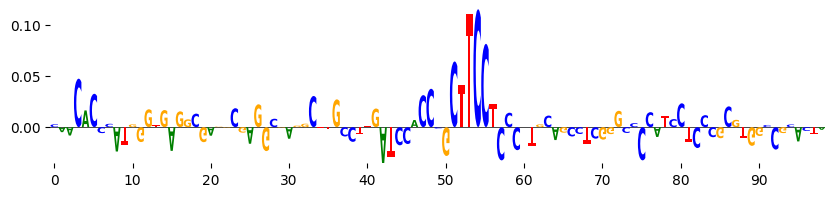

In [13]:
attribution_ref.plot_seqlogo(relative_loc=24045)

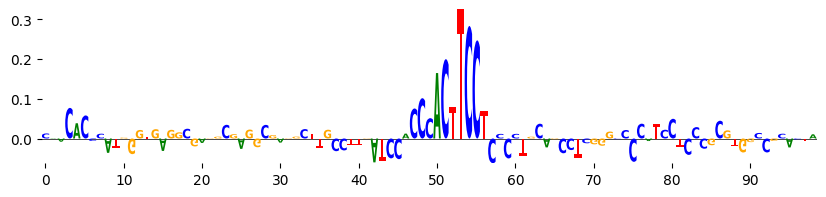

In [14]:
attribution_alt.plot_seqlogo(relative_loc=24045)

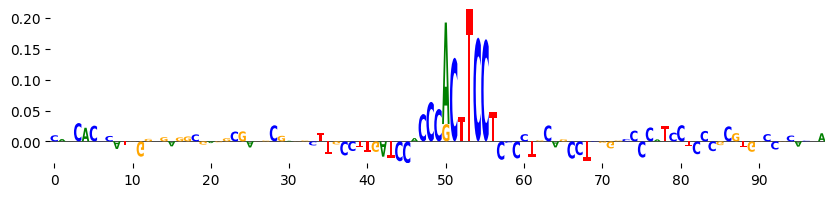

In [15]:
attribution_diff = attribution_alt - attribution_ref
attribution_diff.plot_seqlogo(relative_loc=24045)

In [16]:
attribution_diff.peaks

,peak,start,end,attribution,p-value,from_tss
0,pos.chr9_133251979_C_T_ABO-ABO@24040,74040,74054,1.062168,0.000249,24040
1,pos.chr9_133251979_C_T_ABO-ABO@24071,74071,74077,0.084875,0.000300,24071
2,pos.chr9_133251979_C_T_ABO-ABO@23950,73950,73956,0.077155,0.000300,23950
3,pos.chr9_133251979_C_T_ABO-ABO@784,50784,50790,0.073198,0.000300,784
4,pos.chr9_133251979_C_T_ABO-ABO@755,50755,50760,0.051404,0.000338,755
...,...,...,...,...,...,...
39,neg.chr9_133251979_C_T_ABO-ABO@479,50479,50483,-0.028738,0.000431,479
40,neg.chr9_133251979_C_T_ABO-ABO@19662,69662,69671,-0.100773,0.000451,19662
41,neg.chr9_133251979_C_T_ABO-ABO@857,50857,50862,-0.039062,0.000451,857
42,neg.chr9_133251979_C_T_ABO-ABO@24184,74184,74190,-0.038328,0.000484,24184


In [17]:
attribution_diff.scan_motifs().sort_values("site_attr_score", ascending=False).head(20)

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


,motif,peak,start,end,strand,score,p-value,matched_seq,site_attr_score,motif_attr_score,from_tss
994,ETV7.H13CORE.1.P.C,neg.chr9_133251979_C_T_ABO-ABO@24059,74046,74053,-,10.482847,0.000305,CTTCCTC,0.026460,0.095351,24046
859,ETV7.H13CORE.1.P.C,neg.chr9_133251979_C_T_ABO-ABO@24052,74046,74053,-,10.482847,0.000305,CTTCCTC,0.026460,0.095351,24046
3198,ETV7.H13CORE.1.P.C,pos.chr9_133251979_C_T_ABO-ABO@24040,74046,74053,-,10.482847,0.000305,CTTCCTC,0.026460,0.095351,24046
3193,ETV4.H13CORE.0.P.B,pos.chr9_133251979_C_T_ABO-ABO@24040,74044,74054,-,11.578735,0.000074,CACTTCCTCC,0.024599,0.081912,24044
857,ETV6.H13CORE.0.PS.A,neg.chr9_133251979_C_T_ABO-ABO@24052,74044,74054,-,13.125338,0.000025,CACTTCCTCC,0.024599,0.084022,24044
854,ETV4.H13CORE.0.P.B,neg.chr9_133251979_C_T_ABO-ABO@24052,74044,74054,-,11.578735,0.000074,CACTTCCTCC,0.024599,0.081912,24044
3196,ETV6.H13CORE.0.PS.A,pos.chr9_133251979_C_T_ABO-ABO@24040,74044,74054,-,13.125338,0.000025,CACTTCCTCC,0.024599,0.084022,24044
3314,ZNF683.H13CORE.0.PSG.A,pos.chr9_133251979_C_T_ABO-ABO@24040,74043,74054,-,7.401650,0.000276,CCACTTCCTCC,0.023818,0.067815,24043
969,ZNF683.H13CORE.0.PSG.A,neg.chr9_133251979_C_T_ABO-ABO@24052,74043,74054,-,7.401650,0.000276,CCACTTCCTCC,0.023818,0.067815,24043
871,KLF17.H13CORE.1.P.C,neg.chr9_133251979_C_T_ABO-ABO@24052,74043,74054,-,9.248973,0.000253,CCACTTCCTCC,0.023818,0.052393,24043


If you wish to identify regulatory motifs, you can obtain seqlets using recursive seqlet calling for the variant-gene pairs with the following command:

In [18]:
with VariantAttributionResult("example/vep_vcf_attributions.h5", tss_distance=50_000, num_workers=1) as ar:
    df_peaks, df_motifs = ar.recursive_seqlet_calling(["chr9_133251979_C_T"], ["ABO"])

wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:06.0 (522.3MB/s)


Computing recursive seqlet calling...:   0%|          | 0/1 [00:00<?, ?it/s]

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:02.0 (1546.6MB/s)


Computing recursive seqlet calling...:   0%|          | 0/1 [00:00<?, ?it/s]

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

In [19]:
df_motifs

,motif,peak,start,end,strand,score,p-value,matched_seq,site_attr_score,motif_attr_score,from_tss,allele
0,Z585A.H13CORE.0.P.C,neg.chr9_133251979_C_T_ABO@2153,52150,52173,-,21.043345,2.714465e-08,TCTTTGTTTTCCCTTTTTTGTCT,-0.003653,-0.008740,2150,ref
1,CTCFL.H13CORE.0.P.B,pos.chr9_133251979_C_T_ABO@760,50756,50772,+,20.821767,3.492460e-08,GCCGGGAGGGGGCGCC,0.016934,0.059062,756,ref
2,CTCFL.H13CORE.0.P.B,pos.chr9_133251979_C_T_ABO@755,50756,50772,+,20.821767,3.492460e-08,GCCGGGAGGGGGCGCC,0.016934,0.059062,756,ref
3,GRHL1.H13CORE.0.PSM.A,neg.chr9_133251979_C_T_ABO@25122,75111,75130,-,20.659863,3.644891e-08,AACCTGAAAAACCGGTTCA,-0.001653,-0.006104,25111,ref
4,GRHL3.H13CORE.0.SB.A,neg.chr9_133251979_C_T_ABO@25122,75112,75130,+,20.023842,3.720925e-08,ACCTGAAAAACCGGTTCA,-0.001693,-0.006160,25112,ref
...,...,...,...,...,...,...,...,...,...,...,...,...
9765,ZN124.H13CORE.0.P.C,pos.chr9_133251979_C_T_ABO@799,50797,50809,-,6.514214,4.991293e-04,CCGGGCGGAAGG,0.030402,0.064038,797,alt
9766,ZN320.H13CORE.0.P.B,neg.chr9_133251979_C_T_ABO@24107,74102,74125,+,4.026217,4.993357e-04,GGGGGCGGAGTGGGGACCAGACC,-0.001394,-0.001536,24102,alt
9767,ZN320.H13CORE.0.P.B,neg.chr9_133251979_C_T_ABO@24115,74102,74125,+,4.026217,4.993357e-04,GGGGGCGGAGTGGGGACCAGACC,-0.001394,-0.001536,24102,alt
9768,CGGBP1.H13CORE.0.PSGIB.A,neg.chr9_133251979_C_T_ABO@736,50737,50748,-,9.182252,4.999638e-04,GGGGCGGCGGG,-0.001905,-0.002937,737,alt


In [20]:
df = (
    df_motifs[df_motifs["allele"] == "ref"]
    .set_index(["motif", "peak"])[["site_attr_score"]]
    .join(
        df_motifs[df_motifs["allele"] == "alt"].set_index(["motif", "peak"])[["site_attr_score"]],
        rsuffix="_alt",
        how="inner",
    )
)
df["site_attr_score_diff"] = df["site_attr_score_alt"] - df["site_attr_score"]
df.sort_values("site_attr_score_diff", ascending=False)

site_attr_score  \
motif                    peak                                              
TFDP1.H13CORE.0.P.B      neg.chr9_133251979_C_T_ABO@789         0.005604   
CTCFL.H13CORE.0.P.B      pos.chr9_133251979_C_T_ABO@755        -0.002148   
SP5.H13CORE.0.P.B        neg.chr9_133251979_C_T_ABO@751        -0.002173   
                         pos.chr9_133251979_C_T_ABO@755        -0.002173   
SLC2A4RG.H13CORE.0.PSG.A pos.chr9_133251979_C_T_ABO@799         0.013545   
...                                                                  ...   
SP5.H13CORE.0.P.B        pos.chr9_133251979_C_T_ABO@755         0.016457   
                         neg.chr9_133251979_C_T_ABO@751         0.016457   
CTCFL.H13CORE.0.P.B      pos.chr9_133251979_C_T_ABO@755         0.016934   
SLC2A4RG.H13CORE.0.PSG.A pos.chr9_133251979_C_T_ABO@799         0.036024   
                         neg.chr9_133251979_C_T_ABO@789         0.036024   

                                                         site_attr_score_alt  \
motif                    peak                                                  
TFDP1.H13CORE.0.P.B      neg.chr9_133251979_C_T_ABO@789             0.033031   
CTCFL.H13CORE.0.P.B      pos.chr9_133251979_C_T_ABO@755             0.020881   
SP5.H13CORE.0.P.B        neg.chr9_133251979_C_T_ABO@751             0.020172   
                         pos.chr9_133251979_C_T_ABO@755             0.020172   
SLC2A4RG.H13CORE.0.PSG.A pos.chr9_133251979_C_T_ABO@799             0.034428   
...                                                                      ...   
SP5.H13CORE.0.P.B        pos.chr9_133251979_C_T_ABO@755            -0.001859   
                         neg.chr9_133251979_C_T_ABO@751            -0.001859   
CTCFL.H13CORE.0.P.B      pos.chr9_133251979_C_T_ABO@755            -0.001661   
SLC2A4RG.H13CORE.0.PSG.A pos.chr9_133251979_C_T_ABO@799             0.012775   
                         neg.chr9_133251979_C_T_ABO@789             0.012775   

                                                         site_attr_score_diff  
motif                    peak                                                  
TFDP1.H13CORE.0.P.B      neg.chr9_133251979_C_T_ABO@789              0.027427  
CTCFL.H13CORE.0.P.B      pos.chr9_133251979_C_T_ABO@755              0.023029  
SP5.H13CORE.0.P.B        neg.chr9_133251979_C_T_ABO@751              0.022344  
                         pos.chr9_133251979_C_T_ABO@755              0.022344  
SLC2A4RG.H13CORE.0.PSG.A pos.chr9_133251979_C_T_ABO@799              0.020883  
...                                                                       ...  
SP5.H13CORE.0.P.B        pos.chr9_133251979_C_T_ABO@755             -0.018316  
                         neg.chr9_133251979_C_T_ABO@751             -0.018316  
CTCFL.H13CORE.0.P.B      pos.chr9_133251979_C_T_ABO@755             -0.018594  
SLC2A4RG.H13CORE.0.PSG.A pos.chr9_133251979_C_T_ABO@799             -0.023249  
                         neg.chr9_133251979_C_T_ABO@789             -0.023249  

[4504 rows x 3 columns]